In [6]:
from furlib import *
def dh(a,alpha,d,theta):
    """
    Calcula la matriz de Denavit-Hartenberg de manera simbólica
    """
    M = Matrix([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M


d1 = 486.5
a1 = 150
a2 = 475
d4 = 600
d6 = 65

deg = lambda x: (x*180/pi).evalf()

x,y,z = 700,20,1000

H = Matrix([[0,-0.70711,0.70711,700],[1,0,0,20],[0,0.70711,0.70711,1000],[0,0,0,1]])

xm,ym,zm = x - d6*H[0,2], y - d6*H[1,2], z - d6*H[2,2]

T1 = atan2(ym,xm)
c = sqrt(xm**2 + ym**2)
a = c - a1
b = zm - d1
r = sqrt(a**2 + b**2)
K1 = (r**2 + a2**2 - d4**2)/(2*r*a2)
K2 = (r**2 - a2**2 - d4**2)/(2*a2*d4)
alpha = atan2(b,a)
beta = atan2(sqrt(1-K1**2), K1)
T2 = -(alpha - beta)
T3 = -( atan2(sqrt(1-K2**2), K2) + pi/2 )

R3_0 = (simplify(dh(150,-pi/2,486.5,t1)*dh(475,0,0,t2)*dh(0,-pi/2,0,t3))[:3,:3]).subs({t1:T1, t2:T2, t3:T3})
R6_0 = H[:3,:3]

B = R3_0.inv()*(R6_0)

T4 = atan2(-B[1,2], -B[0,2])
T5 = atan2(sqrt(1-B[2,2]**2), B[2,2])
T6 = atan2(-B[2,1], B[2,0])

deg(T1),deg(T2),deg(T3),deg(T4),deg(T5),deg(T6)

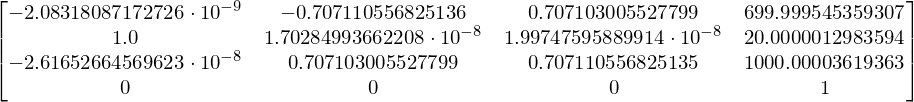

In [7]:
vals = {t1:T1, t2:T2, t3:T3, t4:T4, t5:T5, t6:T6}
simplify((dh(150,-pi/2,486.5,t1)*dh(475,0,0,t2)*dh(0,-pi/2,0,t3)*dh(0,pi/2,600,t4)*dh(0,-pi/2,0,t5)*dh(0,0,65,t6)).subs(vals))